In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

# Salary_hike: Build a prediction model for Salary hike 

In [2]:
#IMPORTING DATASET
salary=pd.read_csv("Salary_Data.csv")
salary.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [64]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [67]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 1.0, 'Experience vs Salary')

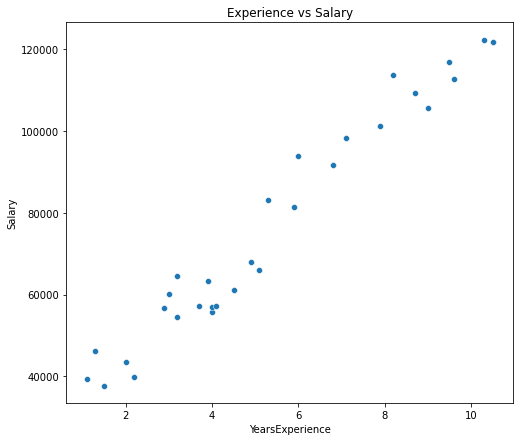

In [4]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=salary,x="YearsExperience",y="Salary")
plt.title("Experience vs Salary")

In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\haari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

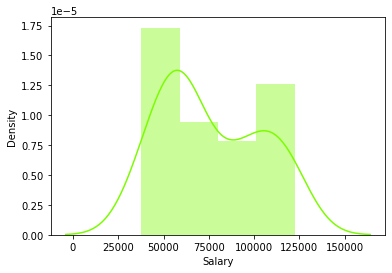

In [6]:
sns.distplot(salary["Salary"],color="lawngreen")

C:\Users\haari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

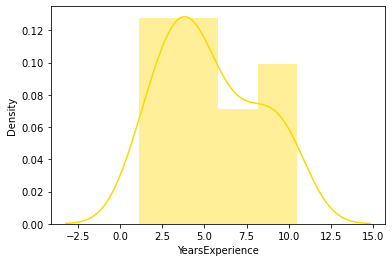

In [7]:
sns.distplot(salary["YearsExperience"],color="gold")

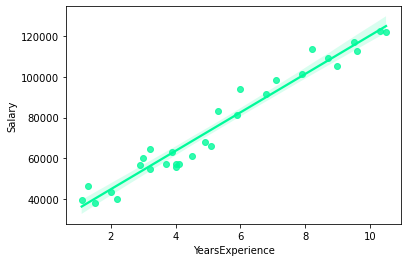

In [8]:
sns.regplot(x='YearsExperience',y='Salary',data=salary,color='mediumspringgreen');

# MODEL BUILDING USING NORMAL DATA

In [15]:
model_smf=smf.ols('Salary~YearsExperience',data=salary).fit()
print(model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        15:11:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

# MODEL  BUILDING USING LOG TRANSFORMATIONS

In [23]:
x=np.log(salary["Salary"])
y=np.log(salary["YearsExperience"])

In [43]:
salary_log=pd.DataFrame()
salary_log["Salary"]=x
salary_log["YearsExperience"]=y

In [44]:
salary_log

,Salary,YearsExperience
0,10.580073,0.095310
1,10.740843,0.262364
2,10.538237,0.405465
3,10.681091,0.693147
4,10.593906,0.788457
5,10.944506,1.064711
6,11.004597,1.098612
7,10.904946,1.163151
8,11.073567,1.163151
9,10.954117,1.308333


In [46]:
log_model_smf=smf.ols('Salary~YearsExperience',data=salary_log).fit()
print(log_model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.40e-16
Time:                        15:39:19   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    1

# BUILDING MODEL USING SQUAREROOT OF DATA

In [47]:
x=np.sqrt(salary["Salary"])
y=np.sqrt(salary["YearsExperience"])

In [54]:
salary_sqrt=pd.DataFrame()
salary_sqrt["Salary"]=x
salary_sqrt["YearsExperience"]=y
salary_sqrt

,Salary,YearsExperience
0,198.350700,1.048809
1,214.953483,1.140175
2,194.244691,1.224745
3,208.626460,1.414214
4,199.727314,1.483240
5,237.995798,1.702939
6,245.254969,1.732051
7,233.334524,1.788854
8,253.860198,1.788854
9,239.142217,1.923538


In [55]:
sqrt_model_smf=smf.ols('Salary~YearsExperience',data=salary_sqrt).fit()
print(sqrt_model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.58e-19
Time:                        15:46:53   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     

# PREDICTING SALARY

In [61]:
newdata=pd.Series([float(input("Enter your Experience : "))])
data_predict=pd.DataFrame(newdata, columns=["YearsExperience"])
psalary=model_smf.predict(data_predict)
print("Based on yor Experience your Expected salary is: ", (psalary.values)[0])

Enter your Experience : 4.5
Based on yor Experience your Expected salary is:  68317.03064521655


 - This Model can predict Salary with 95.6% 

# Delivery_time: Predict delivery time using sorting time

In [62]:
# IMPORTING DATASET
delivery=pd.read_csv("delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [63]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [65]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [69]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Text(0.5, 1.0, 'Sorting Time vs Delivery Time')

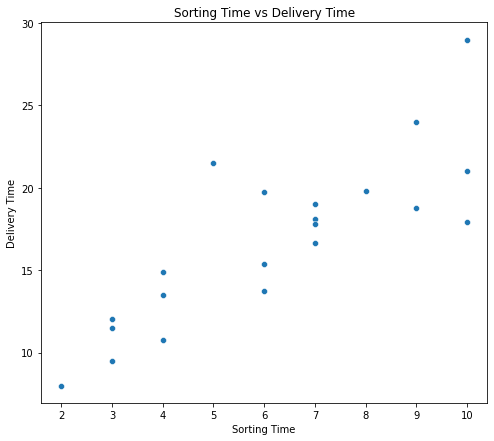

In [70]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=delivery,x="Sorting Time",y="Delivery Time")
plt.title("Sorting Time vs Delivery Time")

C:\Users\haari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


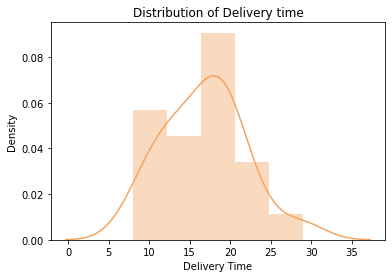

In [71]:
sns.distplot(delivery['Delivery Time'],color='sandybrown')
plt.title('Distribution of Delivery time');

C:\Users\haari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


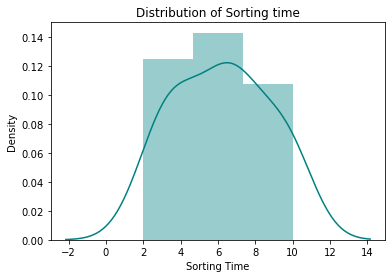

In [73]:
sns.distplot(delivery['Sorting Time'],color='teal')
plt.title("Distribution of Sorting time");

In [74]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Regression line')

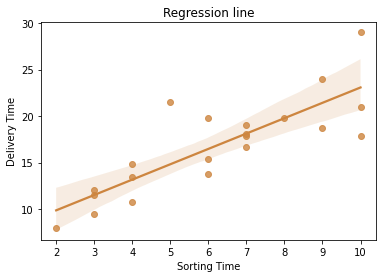

In [75]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=delivery,color='peru');
plt.title("Regression line")

# MODEL BUILDING USING NORMAL DATA

In [82]:
delivery.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1,inplace=True)
model_smf=smf.ols('Delivery_Time~Sorting_Time', data=delivery).fit()
print(model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        16:22:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

# MODEL BUILDING USING LOG OF NORMAL DATA

In [85]:
delivery_log=pd.DataFrame()
delivery_log["Delivery_Time"]=np.log(delivery["Delivery_Time"])
delivery_log["Sorting_Time"]=np.log(delivery["Sorting_Time"])
delivery_log.head()

,Delivery_Time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


In [90]:
log_model_smf=smf.ols('Delivery_Time~Sorting_Time', data=delivery_log).fit()
print(log_model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.60e-07
Time:                        16:36:40   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086   

# PREDICTION
 - As log model has greater accuracy then normal model so we are using log model

In [93]:
newdata=pd.Series([(int(input("Enter sorting time: ")))])
deltime=pd.DataFrame(newdata,columns=["Sorting_Time"])
Ndel_time=log_model_smf.predict((np.log(deltime)))
print("Based on your Sorting time Expected Delivery time is :", (np.exp((Ndel_time.values)[0])),"minutes")

Enter sorting time: 4
Based on your Sorting time Expected Delivery time is : 13.070122806797153 minutes


 - This Model predicts delivery time with accuracy of 77.2%